In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Feature Engineering

In [4]:
df.drop(['User ID'],axis=1,inplace=True)

In [5]:
dict = {
    'Male' : 0,
    'Female' : 1
}
df['Gender'] = df['Gender'].map(dict)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## Spliting data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=df.drop(['Purchased'],axis=1)
y=df['Purchased']
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [9]:
x_train.head()

,Gender,Age,EstimatedSalary
3,1,27,57000
18,0,46,28000
202,1,39,134000
250,1,44,39000
274,1,57,26000


In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
log_reg = LogisticRegression()
log_reg.fit(x_train , y_train)
pred = log_reg.predict(x_test)
print(accuracy_score(pred,y_test))

0.65


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)
pred = rfc.predict(x_test)
print(accuracy_score(pred,y_test))

0.9


## K Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)
pred = knn.predict(x_test)
print(accuracy_score(pred,y_test))

0.825


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)
pred = dtree.predict(x_test)
print(accuracy_score(pred,y_test))

0.8375


**predict_proba : returns probability of occurance of class example here we have two class '0' and '1'** 

In [19]:
pm=dtree.predict_proba(x_test)
pm

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form. The number of probabilities for each row is equal to the number of categories in target variable (2 in your case).

Does it mean, the probability of occurance of 0 is 0.237… and 1 is 0.762…?

Yes, here 0,237… is the probability that the output will be 0 and 0.762… is the probability of output being 1.

Suppose you only want the probability of getting the output either as 0 or 1, you can do some changes in your code and you will get only one output for each observation. You can use the following code:

model.predict_proba(test)[:,1]
Here,
model is the trained model (name may vary in your case, so change it accordingly)
test is the dataset i made predictions for (change it according to your dataset)

Using [:,1] in the code will give you the probabilities of getting the output as 1. If you replace 1 with 0 in the above code, you will only get the probabilities of getting the output as 0.

example :
In your case it says there is 23% probability of point being 0 and 76% probability of point being 1.

Now where to use predict and predict_proba.
Predict can be used normally to get prediction values.

But suppose you are working on cancer diagnosis problem and you want to be very sure with your results. So in that case you can use predict_proba which will give you class probability values and you can set some threshold like if predict_proba_value > .98 return class 1 else 0. So basically with the help of predit_proba we can set threshold as per our needs.

In [20]:
pm[:,1]
## probability of occurance of getting 1

array([1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])

In [21]:
pm[:,0]
## probability of occurance of getting 0

array([0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.])

## ROC AND AUC Curve

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
print("RF test roc_auc : {}".format(roc_auc_score(y_test , pred)))

RF test roc_auc : 0.8090659340659341


In [24]:
pred = []
for model in [log_reg ,rfc, knn,dtree]:
    pred.append(pd.Series(model.predict(x_test)))
print(pred)

[0     0
1     0
2     0
3     0
4     0
     ..
75    0
76    0
77    0
78    0
79    0
Length: 80, dtype: int64, 0     1
1     0
2     0
3     1
4     0
     ..
75    0
76    1
77    1
78    0
79    0
Length: 80, dtype: int64, 0     1
1     1
2     0
3     1
4     1
     ..
75    0
76    1
77    1
78    0
79    0
Length: 80, dtype: int64, 0     1
1     1
2     0
3     1
4     0
     ..
75    0
76    1
77    1
78    0
79    0
Length: 80, dtype: int64]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
print((pred[0][0]+pred[1][0]+pred[2][0]+pred[3][0])/4)
print((pred[0][1]+pred[1][1]+pred[2][1]+pred[3][1])/4)
print((pred[0][2]+pred[1][2]+pred[2][2]+pred[3][2])/4)
print((pred[0][3]+pred[1][3]+pred[2][3]+pred[3][3])/4)

0.75
0.5
0.0
0.75


In [26]:
final_prediction = pd.concat(pred,axis=1).mean(axis=1)

In [27]:
final_prediction

0     0.75
1     0.50
2     0.00
3     0.75
4     0.25
      ... 
75    0.00
76    0.75
77    0.75
78    0.00
79    0.00
Length: 80, dtype: float64

In [28]:
y_test.head()

209    0
280    1
33     0
210    1
93     0
Name: Purchased, dtype: int64

In [29]:
print("All model roc_auc : {}".format(roc_auc_score(y_test , final_prediction)))

All model roc_auc : 0.9035027472527473


In [30]:
pred

[0     0
 1     0
 2     0
 3     0
 4     0
      ..
 75    0
 76    0
 77    0
 78    0
 79    0
 Length: 80, dtype: int64,
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 75    0
 76    1
 77    1
 78    0
 79    0
 Length: 80, dtype: int64,
 0     1
 1     1
 2     0
 3     1
 4     1
      ..
 75    0
 76    1
 77    1
 78    0
 79    0
 Length: 80, dtype: int64,
 0     1
 1     1
 2     0
 3     1
 4     0
      ..
 75    0
 76    1
 77    1
 78    0
 79    0
 Length: 80, dtype: int64]

In [31]:
pd.concat(pred , axis=1)

,0,1,2,3
0,0,1,1,1
1,0,0,1,1
2,0,0,0,0
3,0,1,1,1
4,0,0,1,0
...,...,...,...,...
75,0,0,0,0
76,0,1,1,1
77,0,1,1,1
78,0,0,0,0


In [32]:
final_prediction

0     0.75
1     0.50
2     0.00
3     0.75
4     0.25
      ... 
75    0.00
76    0.75
77    0.75
78    0.00
79    0.00
Length: 80, dtype: float64

In [33]:
fpr , tpr , thresholds = roc_curve(y_test , final_prediction)

here fpr , tpr and thresholds values will very from one to another model , for decision tree no of threshods maybe 5 and for logistic regression maybe 2 ... this thresholds keep changing from '0' fpr,tpr value until it get fpr,tpr value as '1' if tpr=1 then model has predicted all true positive's values correctly and if fpr = '1' then model has predicted all values false,
<br/><br/>
tpr = how many actual correctly values predicted by model out of all actual correct values
<br/><br/>
fpr = how many false incorrectly values predicted by model out of all actual correct values
<br/><br/>
do watch this video to know why roc auc curve is used and in which case <br/>
tpr,fpr and thresholds : https://www.youtube.com/watch?v=mUMd_cKU0VM<br/><br/>
note : you can use predict_proba function to change thresholds and classifier according to you , first know which threshold is best for your problem statement andd choose threshold and manipulate predicted values by using predict_proba function


In [34]:
fpr

array([0.        , 0.07692308, 0.09615385, 0.13461538, 1.        ])

In [35]:
tpr

array([0.        , 0.57142857, 0.82142857, 0.92857143, 1.        ])

In [36]:
thresholds

array([1.75, 0.75, 0.5 , 0.25, 0.  ])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction > thres,1,0)
    accuracy_ls.append(accuracy_score(y_test , y_pred , normalize=True))

In [39]:
accuracy_ls

[0.65, 0.65, 0.8, 0.875, 0.8875]

In [40]:
accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls

,0,1
0,1.75,0.6500
1,0.75,0.6500
2,0.50,0.8000
3,0.25,0.8750
4,0.00,0.8875


In [41]:
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending = False,inplace =True)

In [42]:
accuracy_ls.head()

,thresholds,accuracy
4,0.00,0.8875
3,0.25,0.8750
2,0.50,0.8000
0,1.75,0.6500
1,0.75,0.6500


In [43]:
def plt_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Receiver Operating Charactterstic (ROC) Curve")
    plt.legend()
    plt.show()

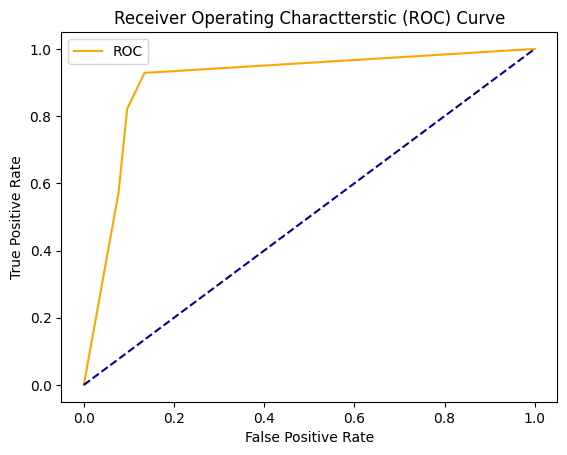

In [44]:
plt_roc_curve(fpr,tpr)